In [44]:
#NEW MODEL

#ROLLING (absolute) MEAN OF NORMALIZED DATA

import pandas as pd
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import numpy as np
import os

input_dir = "mindrove_dataset"
dataval= pd.read_csv(os.path.join(input_dir, "definitivo_dataset.csv"))

emgval = np.abs(dataval.iloc[:,2:10] * 0.045)
data = np.array(emgval)

#FIRST: NORMALIZE
normalized_data = np.empty_like(data)
scalers = []
for i in range(data.shape[1]):
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler.fit(data[:, i].reshape(-1, 1))
    scalers.append(scaler)
for i, scaler in enumerate(scalers):
    normalized_data[:, i] = scaler.transform(data[:, i].reshape(-1, 1)).flatten()

taskval = dataval.iloc[:,1]
newdata = np.zeros(((data.shape[0]),9))
newdata[:, 0] = taskval
newdata[:, 1:] = normalized_data

#SECOND: ROLLING MEAN FOR EACH COLUMN
newdata = pd.DataFrame(newdata) #convert to dataframe
roll = newdata.rolling(window=10, step=1).mean()
roll2 = np.zeros(roll.shape)

repetitions = [1,1,1,2,2,2,3,3,3,4,4,4,5,5,5,6,6,6,7,7,7]
count=-1
#he establecido un treshold para que asigne un task u otro y no haya decimales y
#que en total solo sean 7 tasks

for i in range(1,(len(roll))):
        if not roll.iloc[i,0] == 0 and roll.iloc[i-1,0] == 0:
            count += 1
        if not roll.iloc[i,0] == 0 and roll.iloc[i,0] < (repetitions[count]/2):
            roll2[i,0] = 0
        elif not roll.iloc[i,0] == 0 and roll.iloc[i,0] >= (repetitions[count]/2):
            roll2[i,0] = repetitions[count]
#eliminate first 2 values NaN
roll2[9:,1:]= roll.iloc[9:,1:]
MAV = roll2[9:,:]


In [45]:
#ROLLING SSI OF NORMALIZED DATA

#FIRST: SQUARED THE NORMALIZED DATA
normsquared = np.square(normalized_data)   
taskval = dataval.iloc[:,1]
newdata = np.zeros(((data.shape[0]),9))
newdata[:, 0] = taskval
newdata[:, 1:] = normsquared

#SECOND: ROLLING SSI FOR EACH COLUMN
import pandas as pd
newdata = pd.DataFrame(newdata) #convert to dataframe
roll = newdata.rolling(window=10, step=1).mean()
roll2 = np.zeros(roll.shape)
repetitions = [1,1,1,2,2,2,3,3,3,4,4,4,5,5,5,6,6,6,7,7,7]
count=-1
#he establecido un treshold para que asigne un task u otro y no haya decimales y
#que en total solo sean 7 tasks

for i in range(1,(len(roll))):
        if not roll.iloc[i,0] == 0 and roll.iloc[i-1,0] == 0:
            count += 1
        if not roll.iloc[i,0] == 0 and roll.iloc[i,0] < (repetitions[count]/2):
            roll2[i,0] = 0
        elif not roll.iloc[i,0] == 0 and roll.iloc[i,0] >= (repetitions[count]/2):
            roll2[i,0] = repetitions[count]
#eliminate first 9 values NaN           
roll2[9:,1:]= roll.iloc[9:,1:]
SSI = roll2[9:,:]

In [46]:
#JOIN
datasvm = np.concatenate([MAV, SSI[:,1:]], axis=1)
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import precision_score, recall_score
X = datasvm[:,1:] #features
y = datasvm[:,0] #labels
# defining parameter range
param_grid = {'C': [1000, 10000, 100000],
			'gamma': [0.0001, 0.1, 10000, 100000],
			'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X, y)
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)


SyntaxError: invalid syntax (2816690068.py, line 10)

In [42]:
#SVM
import pandas as pd
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
X = datasvm[:,1:] #features
y = datasvm[:,0] #labels
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=42)
rbf = svm.SVC(kernel='rbf', gamma=10000, C=10000).fit(X_train, y_train)
rbf_pred = rbf.predict(X_test)

rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

rbf_precision = precision_score(y_test, rbf_pred, average =  'weighted')
rbf_recall = recall_score(y_test, rbf_pred, average ='weighted')
print('Precision (RBF Kernel): ', "%.2f" % (rbf_precision*100))
print('Recall (RBF Kernel): ', "%.2f" % (rbf_recall*100))


Accuracy (RBF Kernel):  86.99
F1 (RBF Kernel):  87.38
Precision (RBF Kernel):  89.37
Recall (RBF Kernel):  86.99


[Text(0, 0.5, 'Idle'),
 Text(0, 1.5, 'TF'),
 Text(0, 2.5, 'IFF'),
 Text(0, 3.5, 'MFF'),
 Text(0, 4.5, 'RFF'),
 Text(0, 5.5, 'PFF'),
 Text(0, 6.5, 'WE'),
 Text(0, 7.5, 'WF')]

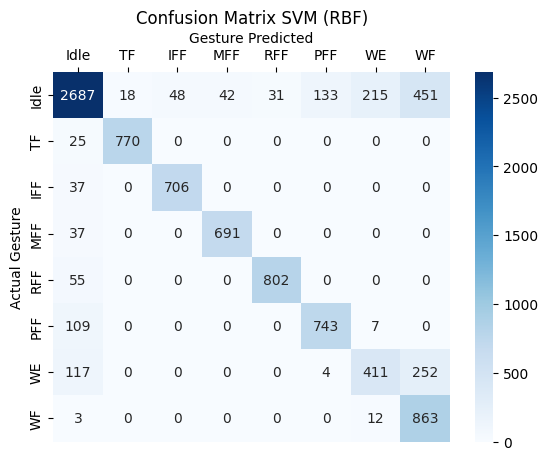

In [39]:
#CONFUSION MATRIX
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Generate the confusion matrix poly
cmpoly= confusion_matrix(y_test, rbf_pred)
# Plot the confusion matrix as a heatmap
ax = sns.heatmap(cmpoly, annot=True, cmap="Blues",fmt='g')
ax.set_title('Confusion Matrix SVM (RBF)')
ax.set_xlabel('Gesture Predicted');ax.set_ylabel('Actual Gesture'); 
ax.xaxis.set_label_position('top') 
ax.xaxis.set_ticklabels(['Idle', 'TF', 'IFF', 'MFF', 'RFF', 'PFF', 'WE', 'WF'])
ax.xaxis.tick_top()
ax.yaxis.set_ticklabels(['Idle', 'TF', 'IFF', 'MFF', 'RFF', 'PFF', 'WE', 'WF'])